# Configure and set up PySpark Session


In [162]:
#from pyspark.sql import SparkSession
#spark = SparkSession.builder.appName('PySpark App HDFS').getOrCreate()
#sc = spark.sparkContext

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [163]:
#%%cleanup -f

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [164]:
# look at sparkmagic, week9

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [165]:
%%configure -f
{"executorMemory": "3G",
 "driverMemory":"5G",
 "executorCores": 1,
 "numExecutors": 10, 
 "conf": {"spark.dynamicAllocation.enabled": "false", 
          "spark.sql.parquet.enableVectorizedReader": "false", 
          "spark.pyspark.python": "python3",
          "spark.pyspark.virtualenv.enabled": "true",
          "spark.pyspark.virtualenv.type": "native",
          "spark.pyspark.virtualenv.bin.path": "/usr/bin/virtualenv"}}



Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
180,application_1681238170162_0180,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
170,application_1681238170162_0170,pyspark,idle,Link,Link,None,
180,application_1681238170162_0180,pyspark,idle,Link,Link,None,✔


## If you run these twice, you'll get 

"An error was encountered:
Package already installed for current Spark context!"

But they should still work.

In [166]:
sc.install_pypi_package('matplotlib')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [167]:
sc.install_pypi_package('PyArrow')


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [168]:
sc.install_pypi_package('pandas')


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [169]:
sc.install_pypi_package('seaborn')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [170]:
import pyspark.sql.functions as fn


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [171]:
import numpy as np


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [172]:
import pandas as pd

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [173]:
import matplotlib.pyplot as plt


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [174]:
import seaborn as sns

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [175]:
df = spark.read.format('parquet').load('s3://msbx5420-spr23/team_mba/cleaned_data.parquet')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Analysis

In [176]:
%%pretty
df.show(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

id,loan_amnt,funded_amnt,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_mths_since_last_major_derog,disbursement_method,debt_settlement_flag,term_in_months,emp_duration,sub_grade_indexed,home_ownership_indexed,sub_grade_indexed_encoded,home_ownership_indexed_encoded,features
118184277,4500.0,4500.0,7.07,139.1,A2,RENT,40400.0,Not Verified,Fully Paid,n,debt_consolidation,801xx,CO,12.0,0.0,740.0,744.0,0.0,0,83.0,10.0,1.0,1031.0,2.2,29.0,0.0,0.0,4809.8270961624,4809.83,4500.0,309.83,0.0,0.0,0.0,3136.06,729.0,725.0,0.0,0,1.0,Individual,0,0,Not Verified,0.0,0.0,16434.0,0.0,2.0,0.0,2.0,16.0,15403.0,73.0,1.0,3.0,900.0,24.0,47600.0,0.0,8.0,0.0,5.0,1643.0,40436.0,2.3,0.0,0.0,170.0,116.0,10.0,10.0,2.0,10.0,0.0,0.0,0.0,0.0,2.0,4.0,5.0,8.0,14.0,8.0,13.0,4.0,10.0,0.0,0.0,0.0,1.0,100.0,0.0,1.0,0.0,68759.0,16434.0,41400.0,21159.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cash,N,36,3,16.0,1.0,"(35,[16],[1.0])","(6,[1],[1.0])","(41,[16,36],[1.0,..."
117289602,4000.0,4000.0,9.93,128.94,B2,MORTGAGE,53000.0,Source Verified,Current,n,credit_card,720xx,AR,20.99,1.0,665.0,669.0,0.0,12.0,0,4.0,0.0,6296.0,80.7,14.0,2148.01,2148.01,2318.71,2318.71,1851.99,466.72,0.0,0.0,0.0,128.94,569.0,565.0,0.0,31.0,1.0,Individual,0,0,Not Verified,0.0,0.0,48764.0,0.0,1.0,0.0,0.0,48.0,42468.0,0,0.0,0.0,3093.0,81.0,7800.0,2.0,1.0,4.0,0.0,12191.0,354.0,94.5,0.0,0.0,187.0,146.0,60.0,48.0,0.0,108.0,0.0,0.0,12.0,3.0,2.0,3.0,2.0,5.0,4.0,3.0,10.0,3.0,4.0,0.0,0.0,0.0,0.0,71.4,100.0,0.0,0.0,63143.0,48764.0,6400.0,55343.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cash,N,36,10,7.0,0.0,"(35,[7],[1.0])","(6,[0],[1.0])","(41,[7,35],[1.0,1..."
118216186,10000.0,10000.0,10.91,326.97,B4,RENT,65000.0,Not Verified,Current,n,debt_consolidation,040xx,ME,17.96,2.0,665.0,669.0,1.0,20.0,0,16.0,0.0,7576.0,44.0,32.0,5406.21,5406.21,5879.4,5879.4,4593.79,1285.61,0.0,0.0,0.0,326.97,674.0,670.0,1.0,57.0,1.0,Individual,0,0,Not Verified,0.0,2032.0,32005.0,1.0,2.0,0.0,0.0,61.0,24429.0,49.0,4.0,7.0,1114.0,48.0,17200.0,0.0,0.0,3.0,7.0,2134.0,5626.0,26.0,0.0,0.0,138.0,253.0,5.0,5.0,0.0,7.0,54.0,1.0,22.0,1.0,3.0,9.0,5.0,11.0,7.0,14.0,25.0,9.0,16.0,0.0,0.0,0.0,4.0,87.1,20.0,0.0,0.0,66695.0,32005.0,7600.0,49495.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cash,N,36,2,2.0,1.0,"(35,[2],[1.0])","(6,[1],[1.0])","(41,[2,36],[1.0,1..."
117584790,20000.0,20000.0,12.62,670.23,C1,MORTGAGE,60000.0,Not Verified,Fully Paid,n,home_improvement,606xx,IL,1

In [177]:
df.printSchema()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- id: string (nullable = true)
 |-- loan_amnt: double (nullable = true)
 |-- funded_amnt: double (nullable = true)
 |-- int_rate: double (nullable = true)
 |-- installment: double (nullable = true)
 |-- sub_grade: string (nullable = true)
 |-- home_ownership: string (nullable = true)
 |-- annual_inc: string (nullable = true)
 |-- verification_status: string (nullable = true)
 |-- loan_status: string (nullable = true)
 |-- pymnt_plan: string (nullable = true)
 |-- purpose: string (nullable = true)
 |-- zip_code: string (nullable = true)
 |-- addr_state: string (nullable = true)
 |-- dti: string (nullable = true)
 |-- delinq_2yrs: string (nullable = true)
 |-- fico_range_low: string (nullable = true)
 |-- fico_range_high: string (nullable = true)
 |-- inq_last_6mths: string (nullable = true)
 |-- mths_since_last_delinq: string (nullable = true)
 |-- mths_since_last_record: string (nullable = true)
 |-- open_acc: string (nullable = true)
 |-- pub_rec: string (nullable = true)
 |--

In [247]:
# can use this to get info on categorical variables

df.groupBy('loan_status').count().show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+-------+
|       loan_status|  count|
+------------------+-------+
|   In Grace Period|   8419|
|Late (31-120 days)|  21416|
|        Fully Paid|1035417|
|           Default|     40|
|       Charged Off| 261440|
|           Current| 876154|
| Late (16-30 days)|   4341|
+------------------+-------+

In [205]:
df_red = df.filter(df['loan_status'] != "Fully Paid")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [206]:
%%pretty
df_red.describe('loan_amnt').show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

summary,loan_amnt
count,1171810
mean,15909.521381452625
stddev,9565.176531533829
min,1000.0
max,40000.0


In [207]:
income_rdd = df.select('annual_inc')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Plots

In [208]:
%%pretty
df_red.show(2)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

id,loan_amnt,funded_amnt,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_mths_since_last_major_derog,disbursement_method,debt_settlement_flag,term_in_months,emp_duration,sub_grade_indexed,home_ownership_indexed,sub_grade_indexed_encoded,home_ownership_indexed_encoded,features
117289602,4000.0,4000.0,9.93,128.94,B2,MORTGAGE,53000.0,Source Verified,Current,n,credit_card,720xx,AR,20.99,1.0,665.0,669.0,0.0,12.0,0,4.0,0.0,6296.0,80.7,14.0,2148.01,2148.01,2318.71,2318.71,1851.99,466.72,0.0,0.0,0.0,128.94,569.0,565.0,0.0,31.0,1.0,Individual,0,0,Not Verified,0.0,0.0,48764.0,0.0,1.0,0.0,0.0,48.0,42468.0,0,0.0,0.0,3093.0,81.0,7800.0,2.0,1.0,4.0,0.0,12191.0,354.0,94.5,0.0,0.0,187.0,146.0,60.0,48.0,0.0,108.0,0.0,0.0,12.0,3.0,2.0,3.0,2.0,5.0,4.0,3.0,10.0,3.0,4.0,0.0,0.0,0.0,0.0,71.4,100.0,0.0,0.0,63143.0,48764.0,6400.0,55343.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cash,N,36,10,7.0,0.0,"(35,[7],[1.0])","(6,[0],[1.0])","(41,[7,35],[1.0,1..."
118216186,10000.0,10000.0,10.91,326.97,B4,RENT,65000.0,Not Verified,Current,n,debt_consolidation,040xx,ME,17.96,2.0,665.0,669.0,1.0,20.0,0,16.0,0.0,7576.0,44.0,32.0,5406.21,5406.21,5879.4,5879.4,4593.79,1285.61,0.0,0.0,0.0,326.97,674.0,670.0,1.0,57.0,1.0,Individual,0,0,Not Verified,0.0,2032.0,32005.0,1.0,2.0,0.0,0.0,61.0,24429.0,49.0,4.0,7.0,1114.0,48.0,17200.0,0.0,0.0,3.0,7.0,2134.0,5626.0,26.0,0.0,0.0,138.0,253.0,5.0,5.0,0.0,7.0,54.0,1.0,22.0,1.0,3.0,9.0,5.0,11.0,7.0,14.0,25.0,9.0,16.0,0.0,0.0,0.0,4.0,87.1,20.0,0.0,0.0,66695.0,32005.0,7600.0,49495.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cash,N,36,2,2.0,1.0,"(35,[2],[1.0])","(6,[1],[1.0])","(41,[2,36],[1.0,1..."


### Histogram of Loan Amounts

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

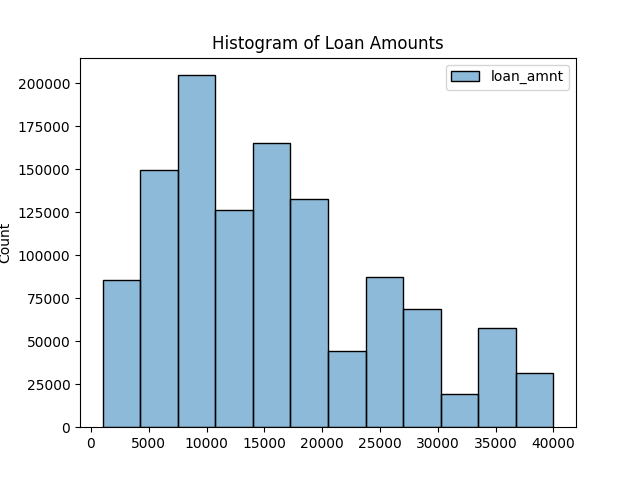

In [209]:
plt.figure().clear()
pandas_df = df_red.select(['loan_amnt']).toPandas()
sns.histplot(pandas_df, bins = 12, legend = True).set_title('Histogram of Loan Amounts')

%matplot plt

In [210]:
%%pretty
df_red.describe('loan_amnt').show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

summary,loan_amnt
count,1171810
mean,15909.521381452625
stddev,9565.176531533827
min,1000.0
max,40000.0


### Interest Rates

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

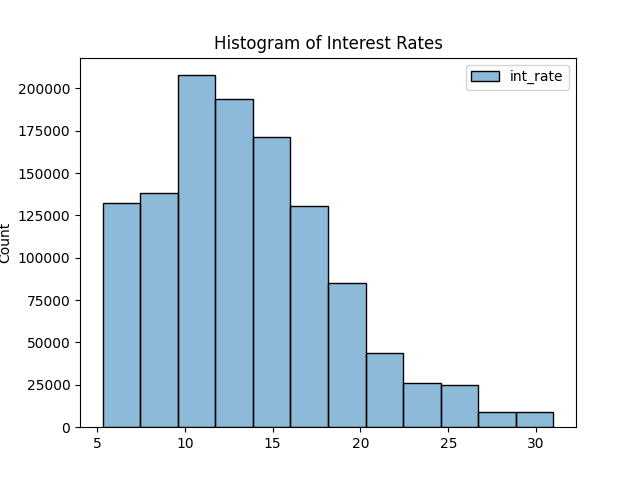

In [211]:
plt.figure().clear()
pandas_df = df_red.select(['int_rate']).toPandas()
sns.histplot(pandas_df, bins = 12, legend = True).set_title('Histogram of Interest Rates')

%matplot plt

In [212]:
%%pretty
df_red.describe('int_rate').show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

summary,int_rate
count,1171810
mean,13.51400357567813
stddev,5.065258587134
min,5.31
max,30.99


### Payment Installment Amounts

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

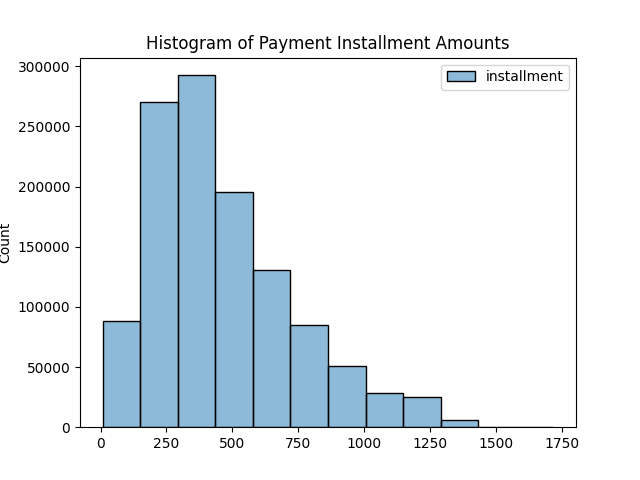

In [213]:
plt.figure().clear()
pandas_df = df_red.select(['installment']).toPandas()
sns.histplot(pandas_df, bins = 12, legend = True).set_title('Histogram of Payment Installment Amounts')

%matplot plt

In [214]:
%%pretty
df_red.describe('installment').show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

summary,installment
count,1171810
mean,459.89961647365374
stddev,272.2201349190238
min,7.61
max,1717.63


### Home Ownership

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

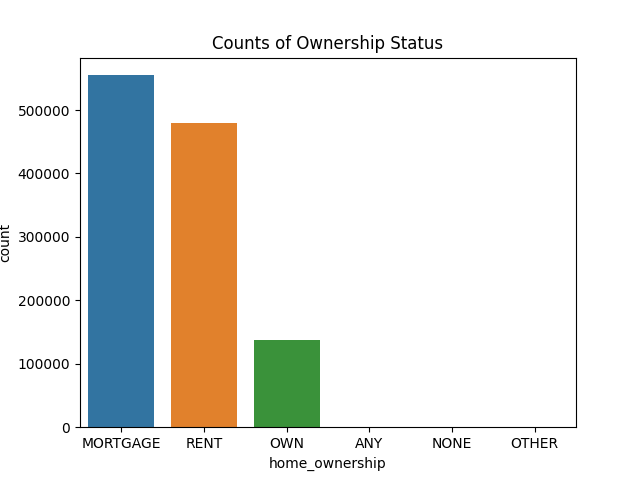

In [215]:
plt.figure().clear()
pandas_df = df_red.select(['home_ownership']).toPandas()
sns.countplot(x = pandas_df['home_ownership']).set_title('Counts of Ownership Status')

%matplot plt

In [216]:
%%pretty
df_1 = df_red.groupBy('home_ownership').count()
df_1.orderBy(df_1['count'].desc()).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

home_ownership,count
MORTGAGE,554939
RENT,478993
OWN,137096
ANY,766
NONE,8
OTHER,8


### Annual Income


In [254]:
plt.figure().clear()
pandas_df = df_red.select(['annual_inc']).toPandas()
pandas_df = pandas_df['annual_inc'].apply(pd.to_numeric, errors='coerce')
sns.histplot(x = pandas_df['annual_inc']).set_title('Counts of Annual Income')

%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
'annual_inc'
Traceback (most recent call last):
  File "/mnt/yarn/usercache/livy/appcache/application_1681238170162_0180/container_1681238170162_0180_01_000001/tmp/1681926781792-0/lib/python3.7/site-packages/pandas/core/series.py", line 942, in __getitem__
    return self._get_value(key)
  File "/mnt/yarn/usercache/livy/appcache/application_1681238170162_0180/container_1681238170162_0180_01_000001/tmp/1681926781792-0/lib/python3.7/site-packages/pandas/core/series.py", line 1051, in _get_value
    loc = self.index.get_loc(label)
  File "/mnt/yarn/usercache/livy/appcache/application_1681238170162_0180/container_1681238170162_0180_01_000001/tmp/1681926781792-0/lib/python3.7/site-packages/pandas/core/indexes/range.py", line 388, in get_loc
    raise KeyError(key)
KeyError: 'annual_inc'



In [259]:
plt.figure().clear()
pandas_df = df_red.select(['annual_inc']).toPandas()
pandas_df = pandas_df['annual_inc'].apply(pd.to_numeric, errors='coerce')
sns.histplot(x = pandas_df['annual_inc']).set_title('Counts of Annual Income')

%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
'annual_inc'
Traceback (most recent call last):
  File "/mnt/yarn/usercache/livy/appcache/application_1681238170162_0180/container_1681238170162_0180_01_000001/tmp/1681926781792-0/lib/python3.7/site-packages/pandas/core/series.py", line 942, in __getitem__
    return self._get_value(key)
  File "/mnt/yarn/usercache/livy/appcache/application_1681238170162_0180/container_1681238170162_0180_01_000001/tmp/1681926781792-0/lib/python3.7/site-packages/pandas/core/series.py", line 1051, in _get_value
    loc = self.index.get_loc(label)
  File "/mnt/yarn/usercache/livy/appcache/application_1681238170162_0180/container_1681238170162_0180_01_000001/tmp/1681926781792-0/lib/python3.7/site-packages/pandas/core/indexes/range.py", line 388, in get_loc
    raise KeyError(key)
KeyError: 'annual_inc'



In [258]:
pandas_df.head()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0     53000.0
1     65000.0
2     38000.0
3    166000.0
4     81000.0
Name: annual_inc, dtype: float64

In [255]:
%%pretty
df_red.describe('annual_inc').show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

summary,annual_inc
count,1171810
mean,78448.87778265242
stddev,140841.54196638972
min,0.0
max,99999.84


In [238]:
%%pretty

df_red.filter(df_red['annual_inc'] == 0).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

id,loan_amnt,funded_amnt,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_mths_since_last_major_derog,disbursement_method,debt_settlement_flag,term_in_months,emp_duration,sub_grade_indexed,home_ownership_indexed,sub_grade_indexed_encoded,home_ownership_indexed_encoded,features
128252299,20000.0,20000.0,16.02,703.34,C5,MORTGAGE,0.0,Not Verified,Current,n,home_improvement,935xx,CA,0.0,0.0,665.0,669.0,0.0,55.0,0,3.0,0.0,0.0,0.0,9.0,14366.47,14348.52,8546.88,8536.2,5633.53,2913.35,0.0,0.0,0.0,703.34,669.0,665.0,0.0,55.0,1.0,Joint App,125000.0,25.99,Not Verified,0.0,0.0,208540.0,0.0,0.0,0.0,0.0,0,0.0,0,1.0,1.0,0.0,0.0,300.0,0.0,0.0,2.0,1.0,104270.0,0.0,0,0.0,0.0,0.0,158.0,10.0,10.0,3.0,0.0,55.0,2.0,55.0,2.0,0.0,0.0,0.0,3.0,0.0,2.0,6.0,0.0,3.0,0.0,0.0,0.0,1.0,66.7,0.0,0.0,0.0,238300.0,0.0,0.0,0.0,49818.0,650.0,654.0,0.0,5.0,7.0,78.8,4.0,14.0,44.0,Cash,N,36,1,9.0,0.0,"(35,[9],[1.0])","(6,[0],[1.0])","(41,[9,35],[1.0,1..."
126346494,4950.0,4950.0,14.08,169.38,C3,MORTGAGE,0.0,Not Verified,Current,n,major_purchase,958xx,CA,0.0,0.0,805.0,809.0,0.0,0,0,4.0,0.0,0.0,0.0,15.0,3270.98,3270.98,2382.45,2382.45,1679.02,688.43,15.0,0.0,0.0,169.38,719.0,715.0,0.0,0,1.0,Joint App,55000.0,38.6,Not Verified,0.0,0.0,101627.0,0.0,0.0,0.0,0.0,65.0,0.0,0,0.0,0.0,0.0,0.0,15500.0,0.0,3.0,0.0,1.0,25407.0,5500.0,0.0,0.0,0.0,115.0,189.0,37.0,11.0,2.0,41.0,0.0,14.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0,3.0,9.0,0.0,4.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,121500.0,0.0,5500.0,0.0,23877.0,585.0,589.0,5.0,1.0,13.0,101.5,2.0,12.0,0.0,Cash,N,36,1,5.0,0.0,"(35,[5],[1.0])","(6,[0],[1.0])","(41,[5,35],[1.0,1..."
137704819,35000.0,35000.0,15.02,833.02,C3,MORTGAGE,0.0,Not Verified,Current,n,credit_card,080xx,NJ,0.0,0.0,800.0,804.0,0.0,0,0,2.0,0.0,0.0,0.0,10.0,32129.44,32129.44,5772.73,5772.73,2870.56,2902.17,0.0,0.0,0.0,833.02,784.0,780.0,0.0,0,1.0,Joint App,105000.0,11.9,Not Verified,0.0,0.0,295304.0,0.0,0.0,0.0,0.0,57.0,0.0,0,1.0,1.0,0.0,0.0,1600.0,0.0,0.0,1.0,1.0,147652.0,0.0,0,0.0,0.0,57.0,176.0,7.0,7.0,2.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,7.0,0.0,2.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,328950.0,0.0,0.0,0.0,36382.0,680.0,684.0,0.0,2.0,8.0,70.9,2.0,15.0,21.0,Cash,N,60,1,5.0,0.0,"(35,[5],[1.0])","(6,[0],[1.0])","(41,[5,35],[1.0,1..."
137440563,35000.0,35000.0,18.94,1281.9,D2,MORTGAGE,0.0,Not Verified,Current,n,debt_consolidation,850xx,AZ,0.0,3.0,660.0,664.0,3.0,8.0,0,5.0,0.0,0.0,0.0,9.0,28831.37,28831.

### Verification Status
Indicates if income was verified by LC, not verified, or if the income source was verified

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

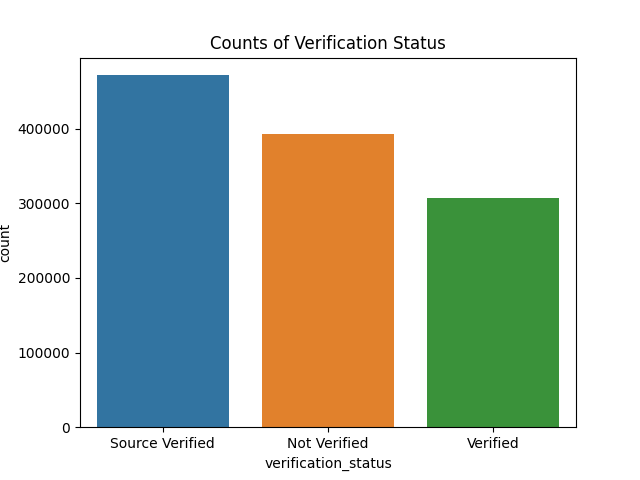

In [219]:
plt.figure().clear()
pandas_df = df_red.select(['verification_status']).toPandas()
sns.countplot(x = pandas_df['verification_status']).set_title('Counts of Verification Status')

%matplot plt

What's the difference between "verified" and "source verified?"

In [220]:
%%pretty
df_1 = df_red.groupBy('verification_status').count()
df_1.orderBy(df_1['count'].desc()).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

verification_status,count
Source Verified,471588
Not Verified,392863
Verified,307359


### Payment Plan
Indicates if a payment plan has been put in place for the loan

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

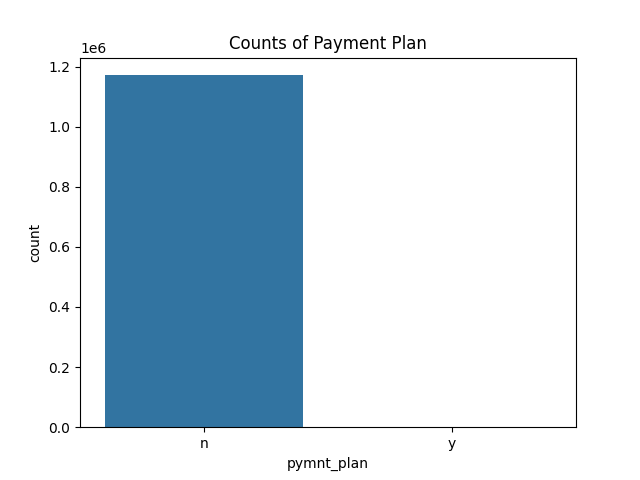

In [221]:
plt.figure().clear()
pandas_df = df_red.select(['pymnt_plan']).toPandas()
sns.countplot(x = pandas_df['pymnt_plan']).set_title('Counts of Payment Plan')

%matplot plt

In [222]:
%%pretty
df_1 = df_red.groupBy('pymnt_plan').count()
df_1.orderBy(df_1['count'].desc()).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

pymnt_plan,count
n,1171192
y,618


### Loan Purpose

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

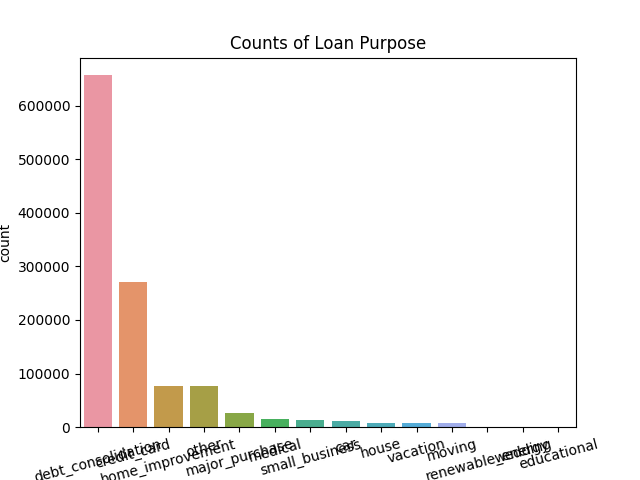

In [223]:
plt.figure().clear()
pandas_df = df_red.select(['purpose']).toPandas()
sns.countplot(x = pandas_df['purpose'],
             order = pandas_df['purpose'].value_counts().index).set_title('Counts of Loan Purpose')
plt.xticks(rotation=15)

%matplot plt

In [224]:
%%pretty
df_1 = df_red.groupBy('purpose').count()
df_1.orderBy(df_1['count'].desc()).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

purpose,count
debt_consolidation,656702
credit_card,270220
home_improvement,77612
other,76531
major_purchase,26040
medical,15087
small_business,13077
car,11291
house,8320
vacation,8097


### State of Borrower

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

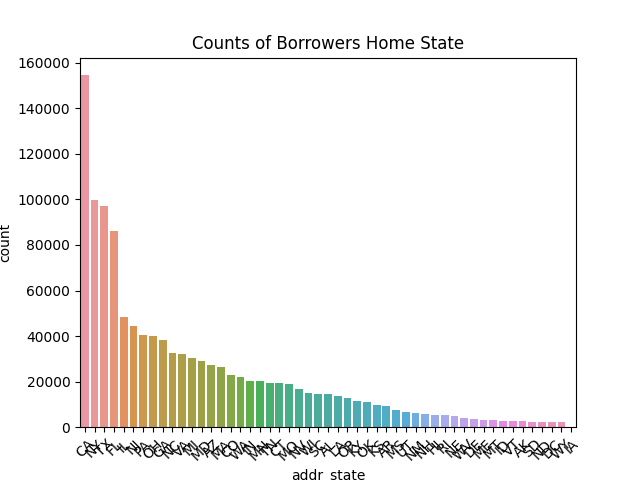

In [242]:
plt.figure().clear()
pandas_df = df_red.select(['addr_state']).toPandas()
sns.countplot(x = pandas_df['addr_state'],
             order = pandas_df['addr_state'].value_counts().index).set_title('Counts of Borrowers Home State')
plt.xticks(rotation=45)

%matplot plt

In [226]:
%%pretty
df_1 = df_red.groupBy('addr_state').count()
df_1.orderBy(df_1['count'].desc()).show(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

addr_state,count
CA,154516
NY,99729
TX,97185
FL,85925
IL,48337


### DTI
A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

We can see that the std is probably extremely skewed do to the max and how close the std is to the mean and zero. 

In [261]:
%%pretty
df_red.describe('dti').show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

summary,dti
count,1171810
mean,19.793950495387634
stddev,16.544852134471487
min,0.0
max,999.0


In [227]:
plt.figure().clear()
pandas_df = df_red.select(['dti']).toPandas()
sns.histplot(pandas_df, legend = True).set_title('Histogram of Payment Installment Amounts')

%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
'NoneType' object is not iterable
Traceback (most recent call last):
  File "/mnt/yarn/usercache/livy/appcache/application_1681238170162_0180/container_1681238170162_0180_01_000001/tmp/1681926781792-0/lib/python3.7/site-packages/seaborn/distributions.py", line 1445, in histplot
    **kwargs,
  File "/mnt/yarn/usercache/livy/appcache/application_1681238170162_0180/container_1681238170162_0180_01_000001/tmp/1681926781792-0/lib/python3.7/site-packages/seaborn/distributions.py", line 461, in plot_univariate_histogram
    for sub_vars, sub_data in self.iter_data("hue", from_comp_data=True):
  File "/mnt/yarn/usercache/livy/appcache/application_1681238170162_0180/container_1681238170162_0180_01_000001/tmp/1681926781792-0/lib/python3.7/site-packages/seaborn/_oldcore.py", line 1065, in iter_data
    iter_keys = itertools.product(*grouping_keys)
TypeError: 'NoneType' object is not iterable



### Delinquency Occurences
The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

In [249]:
plt.figure().clear()
pandas_df = df_red.select(['delinq_2yrs']).toPandas()
sns.histplot(pandas_df, bins = 12, legend = True).set_title('Histogram of Payment Installment Amounts')

%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
'NoneType' object is not iterable
Traceback (most recent call last):
  File "/mnt/yarn/usercache/livy/appcache/application_1681238170162_0180/container_1681238170162_0180_01_000001/tmp/1681926781792-0/lib/python3.7/site-packages/seaborn/distributions.py", line 1445, in histplot
    **kwargs,
  File "/mnt/yarn/usercache/livy/appcache/application_1681238170162_0180/container_1681238170162_0180_01_000001/tmp/1681926781792-0/lib/python3.7/site-packages/seaborn/distributions.py", line 461, in plot_univariate_histogram
    for sub_vars, sub_data in self.iter_data("hue", from_comp_data=True):
  File "/mnt/yarn/usercache/livy/appcache/application_1681238170162_0180/container_1681238170162_0180_01_000001/tmp/1681926781792-0/lib/python3.7/site-packages/seaborn/_oldcore.py", line 1065, in iter_data
    iter_keys = itertools.product(*grouping_keys)
TypeError: 'NoneType' object is not iterable



In [262]:
%%pretty
df_red.describe('delinq_2yrs').show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

summary,delinq_2yrs
count,1171810
mean,0.30555465476485094
stddev,0.8733205326906309
min,0.0
max,9.0


### Fico Scores

Fico scores look like the different between the two is almost exactly 4. 

In [266]:
%%pretty
df_red.describe(['fico_range_low','fico_range_high']).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

summary,fico_range_low,fico_range_high
count,1171810,1171810
mean,698.8681356192557,702.8683643252746
stddev,33.1644695536167,33.165480728576405
min,660.0,664.0
max,845.0,850.0


In [263]:
plt.figure().clear()
pandas_df = df_red.select(['fico_range_high']).toPandas()
sns.histplot(pandas_df, bins = 12, legend = True).set_title('Histogram of Fico Scores')

%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
'NoneType' object is not iterable
Traceback (most recent call last):
  File "/mnt/yarn/usercache/livy/appcache/application_1681238170162_0180/container_1681238170162_0180_01_000001/tmp/1681926781792-0/lib/python3.7/site-packages/seaborn/distributions.py", line 1445, in histplot
    **kwargs,
  File "/mnt/yarn/usercache/livy/appcache/application_1681238170162_0180/container_1681238170162_0180_01_000001/tmp/1681926781792-0/lib/python3.7/site-packages/seaborn/distributions.py", line 461, in plot_univariate_histogram
    for sub_vars, sub_data in self.iter_data("hue", from_comp_data=True):
  File "/mnt/yarn/usercache/livy/appcache/application_1681238170162_0180/container_1681238170162_0180_01_000001/tmp/1681926781792-0/lib/python3.7/site-packages/seaborn/_oldcore.py", line 1065, in iter_data
    iter_keys = itertools.product(*grouping_keys)
TypeError: 'NoneType' object is not iterable



In [228]:
%%pretty
df.show(2)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

id,loan_amnt,funded_amnt,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_mths_since_last_major_derog,disbursement_method,debt_settlement_flag,term_in_months,emp_duration,sub_grade_indexed,home_ownership_indexed,sub_grade_indexed_encoded,home_ownership_indexed_encoded,features
118184277,4500.0,4500.0,7.07,139.1,A2,RENT,40400.0,Not Verified,Fully Paid,n,debt_consolidation,801xx,CO,12.0,0.0,740.0,744.0,0.0,0,83.0,10.0,1.0,1031.0,2.2,29.0,0.0,0.0,4809.8270961624,4809.83,4500.0,309.83,0.0,0.0,0.0,3136.06,729.0,725.0,0.0,0,1.0,Individual,0,0,Not Verified,0.0,0.0,16434.0,0.0,2.0,0.0,2.0,16.0,15403.0,73.0,1.0,3.0,900.0,24.0,47600.0,0.0,8.0,0.0,5.0,1643.0,40436.0,2.3,0.0,0.0,170.0,116.0,10.0,10.0,2.0,10.0,0.0,0.0,0.0,0.0,2.0,4.0,5.0,8.0,14.0,8.0,13.0,4.0,10.0,0.0,0.0,0.0,1.0,100.0,0.0,1.0,0.0,68759.0,16434.0,41400.0,21159.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cash,N,36,3,16.0,1.0,"(35,[16],[1.0])","(6,[1],[1.0])","(41,[16,36],[1.0,..."
117289602,4000.0,4000.0,9.93,128.94,B2,MORTGAGE,53000.0,Source Verified,Current,n,credit_card,720xx,AR,20.99,1.0,665.0,669.0,0.0,12.0,0,4.0,0.0,6296.0,80.7,14.0,2148.01,2148.01,2318.71,2318.71,1851.99,466.72,0.0,0.0,0.0,128.94,569.0,565.0,0.0,31.0,1.0,Individual,0,0,Not Verified,0.0,0.0,48764.0,0.0,1.0,0.0,0.0,48.0,42468.0,0,0.0,0.0,3093.0,81.0,7800.0,2.0,1.0,4.0,0.0,12191.0,354.0,94.5,0.0,0.0,187.0,146.0,60.0,48.0,0.0,108.0,0.0,0.0,12.0,3.0,2.0,3.0,2.0,5.0,4.0,3.0,10.0,3.0,4.0,0.0,0.0,0.0,0.0,71.4,100.0,0.0,0.0,63143.0,48764.0,6400.0,55343.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cash,N,36,10,7.0,0.0,"(35,[7],[1.0])","(6,[0],[1.0])","(41,[7,35],[1.0,1..."


# Code Archive


In [ ]:
def histogram(df, col, bins=10, xname=None, yname=None, title = None):
    
    '''
    This function makes a histogram from spark dataframe named 
    df for column name col. 
    '''
    
    # Calculating histogram in Spark 
    vals = df.select(col).rdd.flatMap(lambda x: x).histogram(bins)
    
    # Preprocessing histogram points and locations 
    width = vals[0][1] - vals[0][0]
    loc = [vals[0][0] + (i+1) * width for i in range(len(vals[1]))]
    
    # Making a bar plot 
    plt.figure().clear()
    plt.bar(loc, vals[1], width=width)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.title(title)

    plt.show()